## 01. Install Keras | Computer Vision with Keras

### What is Keras and what is purpose of this library?

1. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to finding good models.

2. The main purpose of Keras is to provide a simplified interface for creating and training neural networks. It abstracts many of the low-level details that are required for implementing complex neural network architectures and makes it easier for researchers and practitioners to quickly develop and experiment with different models.

3. With Keras, you can define a neural network using a simple stack of layers, and train it using a variety of optimizers, loss functions, and evaluation metrics. Keras also includes a number of pre-trained models that can be used for various tasks such as image classification, natural language processing, and others.

4. In summary, Keras is a user-friendly and efficient library for building and training deep learning models that can run on top of other popular deep learning libraries such as TensorFlow, Theano, and CNTK.


To use keras, we need to download tensorflow --> (framework from google), Keras is an API that works on top of tensorflow.

To install TensorFlow using the pip command, simply open a terminal and run the following command:
1. pip install tensorflow

If you want to install a specific version of TensorFlow, you can specify the version number like this:

2. pip install tensorflow==2.x

Replace x with the desired version number.

#### Import Keras 

In [1]:
from tensorflow import keras

#### Version of Keras

In [2]:
print(keras.__version__)

2.9.0


## 02. Create Layers | Computer Vision with Keras

### 2.1 What is meant by sequential model and functional api in keras?

In Keras, there are two main ways to define a neural network: the Sequential model and the functional API.

1. The Sequential model is a linear stack of layers, where you can use the large variety of available layers in Keras. The most common layer is the Dense layer which is your regular densely connected feedforward layer with all the weights and biases. You can simply add one layer after the other using the .add() method, until you're happy with your model architecture. The Sequential model is a great choice if your model is simple and doesn't require complex network architecture, such as multi-input or multi-output models.

2. On the other hand, the functional API is a more flexible way of defining a model in Keras. It allows you to define a directed acyclic graph of layers, which can be more suitable for complex models. With the functional API, you can define multi-input, multi-output models, shared or non-shared layers, and models with residual connections. The functional API provides a lot of freedom in terms of creating the model architecture and it's often used in complex network structures such as Generative Adversarial Networks (GANs), Residual Networks (ResNets), and many others.
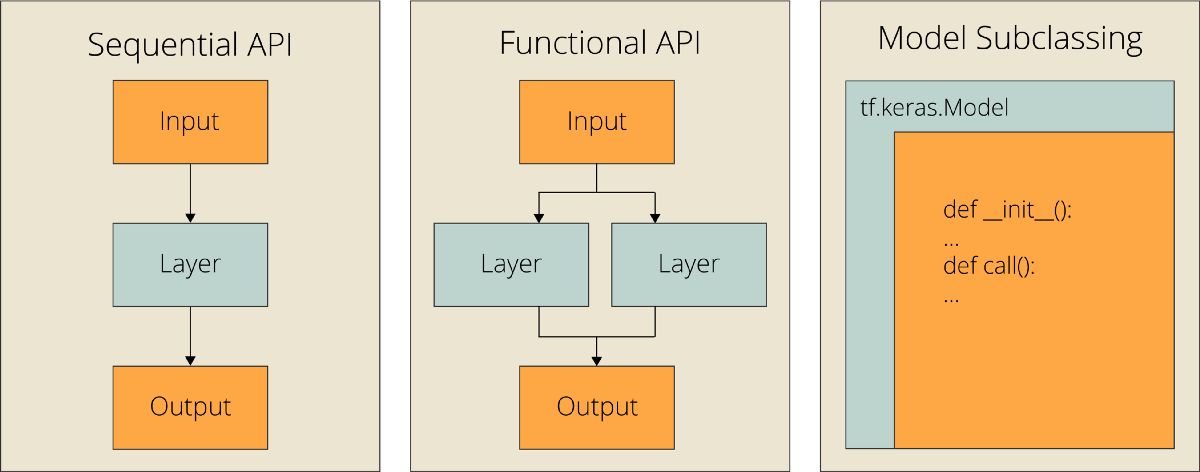

In summary, the Sequential model is a simple way to build a linear stack of layers, while the functional API is a more flexible and powerful way to build complex and multi-input/output models in Keras.






### 2.2 Building Model Using Functional API

#### Load Image

In [3]:
import cv2 as cv

img = cv.imread("1.jpg")

In [4]:
print(img.shape)

(960, 809, 3)


#### Creating Keras Input Layer

First need to convert it to grayscale

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

The layer which takes the input as an image in my case

In [8]:
height, width = img.shape

#### Keras Model Structure

In [10]:
inputLyer = keras.Input(shape=(height, width))
print(inputLyer)

KerasTensor(type_spec=TensorSpec(shape=(None, 960, 809), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [11]:
print(inputLyer.shape)

(None, 960, 809)


None here represents the badge size, means how many images are going to given as input

Defining functional layers/midlle layers

In [12]:
from keras.layers import Dense

Layer One

In [13]:
layerOne = Dense(64)(inputLyer)

Layer Two

In [14]:
layerTwo = Dense(32)(layerOne)

Output

In [15]:
output = Dense(2)(layerTwo)

#### Define Model

In [17]:
model = keras.Model(inputs= inputLyer, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 960, 809)]        0         
                                                                 
 dense (Dense)               (None, 960, 64)           51840     
                                                                 
 dense_1 (Dense)             (None, 960, 32)           2080      
                                                                 
 dense_2 (Dense)             (None, 960, 2)            66        
                                                                 
Total params: 53,986
Trainable params: 53,986
Non-trainable params: 0
_________________________________________________________________
